# Predictive Modelling Task - 1

The task is to predict future stock prices and calculate future returns. I will be working with an assumption that stocks X1 to X56 are not correlated, i.e. price or X1 does not affect or correlate with price of X2-X56)

In this workbook, I will work-through the process of data exploration, analysis and build a process pipeline to achieve the above objective.


## Data Preparation & Exploration:

I will first start with exploring one stock. I will load the data and convert it to time-series.

Dataset: dailyPrices_AtClose.csv
This dataset consists of Time(t) and Stocks (X1- X56) as shown below:

In [30]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# plot utilities
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

# load dailyPrices 
tmp = pd.read_csv('dailyPrices_AtClose.csv')
tmp.head(5)

t()       X1       X2         X3         X4         X5         X6  \
0  2005-01-03  45.8466  39.8955  17.521205  46.667887  19.053180  19.711178   
1  2005-01-04  45.8103  39.9288  17.329738  46.319778  18.938198  19.643724   
2  2005-01-05  45.3294  40.0037  17.034457  45.892188  18.997662  19.448159   
3  2005-01-06  44.6487  40.1786  17.385526  46.667887  19.021430  19.596487   
4  2005-01-07  44.6760  40.1953  17.425426  46.606831  18.981787  19.502105   

          X7         X8         X9   ...           X47      X48        X49  \
0  11.743176  21.664902  16.787895   ...     32.165719  16.0163  22.949870   
1  11.647966  21.796096  16.767126   ...     31.863555  16.2299  22.722644   
2  11.563979  21.628379  16.471335   ...     31.959723  15.9295  22.085422   
3  11.726341  21.628379  16.518067   ...     32.158843  15.8561  22.964689   
4  11.597555  21.446125  16.528452   ...     32.103930  15.9028  24.268772   

         X50  X51        X52        X53      X54  X55      X56  
0  29.390111  NaN  20.434832  15.995224  29.9910  NaN  50.7604  
1  28.797392  NaN  20.211238  16.004092  30.3400  NaN  50.4923  
2  28.079927  NaN  19.794360  15.826448  30.3275  NaN  50.2837  
3  28.360631  NaN  19.770166  15.604467  30.0761  NaN  51.0137  
4  28.150078  NaN  19.407613  15.693240  30.2081  NaN  50.9914  

[5 rows x 57 columns]

In [31]:
# convert data to time-series data while reading from csv itself
dailyPrices = pd.read_csv('dailyPrices_AtClose.csv', parse_dates='t()', index_col='t()')
#dailyPrices.index # check if the index is datetime
# re-index and set frequency='D'
dates = pd.date_range(dailyPrices.index[0], dailyPrices.index[-1], freq='D')
dailyPrices = dailyPrices.reindex(dates)
dailyPrices.index

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-08', '2005-01-09', '2005-01-10',
               '2005-01-11', '2005-01-12',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=4015, freq='D')

In [32]:
# display data
dailyPrices.head(5)

X1       X2         X3         X4         X5         X6  \
2005-01-03  45.8466  39.8955  17.521205  46.667887  19.053180  19.711178   
2005-01-04  45.8103  39.9288  17.329738  46.319778  18.938198  19.643724   
2005-01-05  45.3294  40.0037  17.034457  45.892188  18.997662  19.448159   
2005-01-06  44.6487  40.1786  17.385526  46.667887  19.021430  19.596487   
2005-01-07  44.6760  40.1953  17.425426  46.606831  18.981787  19.502105   

                   X7         X8         X9  X10   ...           X47      X48  \
2005-01-03  11.743176  21.664902  16.787895  NaN   ...     32.165719  16.0163   
2005-01-04  11.647966  21.796096  16.767126  NaN   ...     31.863555  16.2299   
2005-01-05  11.563979  21.628379  16.471335  NaN   ...     31.959723  15.9295   
2005-01-06  11.726341  21.628379  16.518067  NaN   ...     32.158843  15.8561   
2005-01-07  11.597555  21.446125  16.528452  NaN   ...     32.103930  15.9028   

                  X49        X50  X51        X52        X53      X54  X55  \
2005-01-03  22.949870  29.390111  NaN  20.434832  15.995224  29.9910  NaN   
2005-01-04  22.722644  28.797392  NaN  20.211238  16.004092  30.3400  NaN   
2005-01-05  22.085422  28.079927  NaN  19.794360  15.826448  30.3275  NaN   
2005-01-06  22.964689  28.360631  NaN  19.770166  15.604467  30.0761  NaN   
2005-01-07  24.268772  28.150078  NaN  19.407613  15.693240  30.2081  NaN   

                X56  
2005-01-03  50.7604  
2005-01-04  50.4923  
2005-01-05  50.2837  
2005-01-06  51.0137  
2005-01-07  50.9914  

[5 rows x 56 columns]

In [33]:
dailyPrices.describe()

X1           X2           X3           X4           X5  \
count  978.000000  1009.000000  2769.000000  2347.000000  2769.000000   
mean    47.372009    47.450240    30.002073    48.726673    47.053587   
std      7.289463     8.966514     8.430849    13.129556    24.971548   
min     37.420900    32.487100    12.829485    12.812022    18.617020   
25%     42.587475    38.904800    24.486062    41.325853    28.260969   
50%     45.941300    49.052800    28.004784    50.469156    33.789427   
75%     49.186450    52.720800    34.448216    56.287929    65.451877   
max     68.580000    69.460000    51.573840    83.772893   109.701448   

                X6           X7           X8           X9          X10  \
count  2769.000000  2769.000000  2769.000000  2769.000000  1935.000000   
mean     22.536786    22.704316    31.499365    17.299387    40.368427   
std       7.564017    13.011221     7.814852     5.375074    19.318590   
min      10.760470     4.514504    20.082495     6.499510     9.900310   
25%      17.251622    11.810788    26.715576    14.274098    28.733187   
50%      19.588871    16.928472    29.331267    17.036596    35.464466   
75%      28.506444    33.553690    38.054424    21.360561    46.142349   
max      44.435708    52.180468    53.138303    33.446517    94.443481   

          ...              X47          X48          X49          X50  \
count     ...      2769.000000  1887.000000  2769.000000  2769.000000   
mean      ...        61.415186    13.719651    39.158257    43.194567   
std       ...        27.900160     3.200755    33.082999    15.077705   
min       ...        26.697122     6.213900    10.669763    22.883581   
25%       ...        35.749134    11.941300    19.254971    35.164908   
50%       ...        53.007062    13.595700    24.076123    39.288871   
75%       ...        90.351943    14.880550    47.174185    46.838455   
max       ...       123.569173    22.320000   144.002055    94.689728   

               X51          X52          X53          X54         X55  \
count  2655.000000  2769.000000  2769.000000  2769.000000  799.000000   
mean     47.825363    21.729495    20.702823    37.180291   30.190476   
std      20.886531     4.407773    10.421623     8.969457   11.179699   
min      18.150000    14.053334     4.051097    18.972700   14.310000   
25%      27.500000    18.585555    14.302456    30.073700   19.075000   
50%      47.580000    19.866853    16.565938    36.355700   30.410000   
75%      64.970000    25.496197    23.529899    44.297000   39.745000   
max      92.900000    33.162894    53.828289    56.727100   52.160000   

              X56  
count  947.000000  
mean    55.320209  
std      9.897227  
min     41.454600  
25%     49.392150  
50%     52.195700  
75%     58.874350  
max     79.970000  

[8 rows x 56 columns]

Few stocks have lots of missing data. I will choose "X3" as my stock to perform some exploratory analysis. The reason for choosing X3 is that it appears to have maximum amount of data.

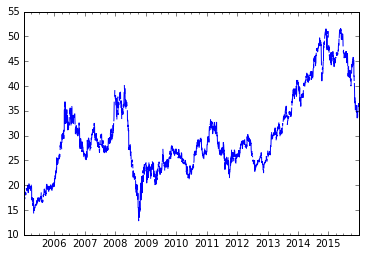

In [34]:
# display one stock data 
dailyPrices.X3.plot()
plt.show()

We have now converted the dailyPrices data to time-series data. Looking at the y-axis, it appears that they are ordered in chronological order with latest being last, so there is no need to sort the data based on time.


### Test for Stationarity of Time Series:

Time series data needs to be Stationary[1] in order to perform statistical analysis or modelling. Let us test if this time-series data is stationary.

References:
* 1: http://people.duke.edu/~rnau/411diff.htm

I will pick one stock to perform this test, i.e. X3. 
First, I will plot a few moving average curve to visually check if the data has constant mean and constant variance.

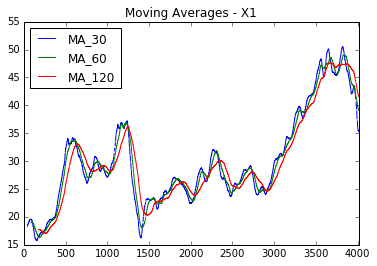

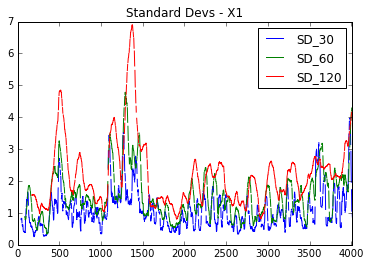

In [35]:
# create a data frame for X1
dframe = pd.DataFrame(dailyPrices.index)
dframe['P(t)'] = dailyPrices.X3.values
df = dframe['P(t)'][~dframe['P(t)'].isnull()]

# moving averages
dframe['MA_30'] = pd.Series.rolling(df, center=False, window=30).mean() # 30 -day MA
dframe['MA_60'] = pd.Series.rolling(df, center=False, window=60).mean() # 60 -day MA
dframe['MA_120'] = pd.Series.rolling(df, center=False, window=120).mean() # 120 -day MA

# standard devs
dframe['SD_30'] = pd.Series.rolling(df, center=False, window=30).std() # 30 -day SD
dframe['SD_60'] = pd.Series.rolling(df, center=False, window=60).std() # 60 -day SD
dframe['SD_120'] = pd.Series.rolling(df, center=False, window=120).std() # 120 -day SD
# plot
dframe.loc[:, ['MA_30', 'MA_60', 'MA_120']].plot( title='Moving Averages - X1')
dframe.loc[:, ['SD_30', 'SD_60', 'SD_120']].plot( title='Standard Devs - X1')

Looking at the plots of moving averages and standard deviations, it is apparent that this time-series is non-stationary in mean and variance.

Let us do a Unit-Root test[2] to confirm that the time-series is non-stationary. I will use Dickey-Fuller[3] test below:

References:
* 2: https://en.wikipedia.org/wiki/Unit_root_test
* 3: https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

In [36]:
# Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

tseries = dailyPrices.X3
# discard missing data
tseries = tseries.dropna()
df = adfuller(tseries)
print(df)

(-1.9373159523818968, 0.3147151708831325, 2, 2766, {'1%': -3.4327163698747731, '5%': -2.8625854938408413, '10%': -2.5673265493658404}, 4695.0025743719834)


Test-Statistic = -1.93  and Critical Values are -3.43, -2.86 and -2.86. And the p-value is greater than 0. Test-Statistic is not lesser than Critical values hence this time-series has Unit Root and is non-stationary.

I will now wrap this into a function.


(-1.9373159523818968, 0.3147151708831325, 2, 2766, {'1%': -3.4327163698747731, '5%': -2.8625854938408413, '10%': -2.5673265493658404}, 4695.0025743719834)
Time series - X3, DFTest: Non Stationary
False


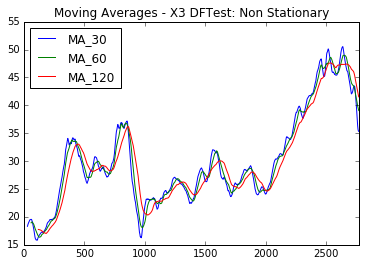

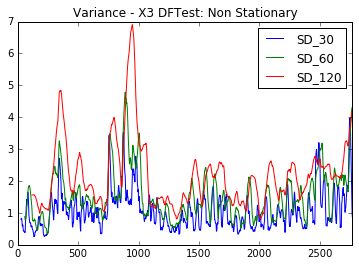

In [37]:
def testStationarity(ts=None, displaySummary=True, displayPlot=True):
    ''' Test whether the input series is stationary or not
    '''
    # remove NAN's
    ts = ts.dropna()
    
    # create a data frame for X1
    dframe = pd.DataFrame(ts.index)
    dframe['P(t)'] = ts.values
    d = dframe['P(t)'][~dframe['P(t)'].isnull()]

    # dickyey-fuller test
    df = adfuller(ts)
    if df[0] < df[4]['1%']:
        confi = 0.99
        isStationary = True;
        strStationary = ' DFTest: Stationary'+ ' (confidence= %.2f)' % confi
        
    elif df[0] < df[4]['5%']:
        confi = 0.95
        isStationary = True;
        strStationary = ' DFTest: Stationary'+ ' (confidence= %.2f)' % confi
        
    elif df[0] < df[4]['10%']:
        confi = 0.90
        isStationary = True;
        strStationary = ' DFTest: Stationary' + ' (confidence= %.2f)' % confi
        
    else:
        confi = 0
        isStationary = False;
        strStationary = ' DFTest: Non Stationary'
        
    # moving averages
    dframe['MA_30'] = pd.Series.rolling(d, center=False, window=30).mean() # 30 -day MA
    dframe['MA_60'] = pd.Series.rolling(d, center=False, window=60).mean() # 60 -day MA
    dframe['MA_120'] = pd.Series.rolling(d, center=False, window=120).mean() # 120 -day MA

    # standard devs
    dframe['SD_30'] = pd.Series.rolling(d, center=False, window=30).std() # 30 -day SD
    dframe['SD_60'] = pd.Series.rolling(d, center=False, window=60).std() # 60 -day SD
    dframe['SD_120'] = pd.Series.rolling(d, center=False, window=120).std() # 120 -day SD
    
    if displayPlot:
        # plot
        dframe.loc[:, ['MA_30', 'MA_60', 'MA_120']].plot( title='Moving Averages - ' + ts.name + strStationary)
        dframe.loc[:, ['SD_30', 'SD_60', 'SD_120']].plot( title='Variance - ' + ts.name + strStationary)
        
    if displaySummary:
        print(df)
        print('Time series - '+ts.name + ',' + strStationary)
        
    return isStationary

test = testStationarity(dailyPrices.X3)
print(test)

I will try to determine if the price is correlated to prices at other timestamps via autocorrelation and partial autocorrelation.

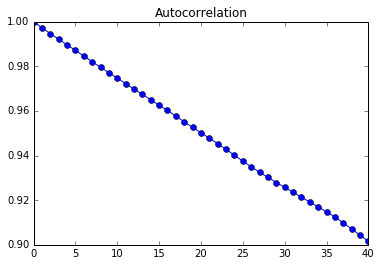

In [38]:
# auto correlation
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

acf_coeffs = acf(dailyPrices.X3.dropna())

# plot
plt.plot(acf_coeffs, marker='o',linestyle='-')
plt.title('Autocorrelation')
plt.show()

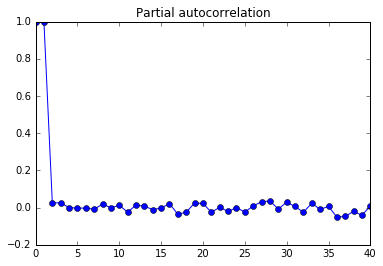

In [39]:
pcf_coeffs = pacf(dailyPrices.X3.dropna())
# plot
plt.plot(pcf_coeffs, marker='o',linestyle='-')
plt.title('Partial autocorrelation')
plt.show()

Autocorrelation plot suggests that the price is heavily correlated with the previous 40-days. Converting non-stationary to stationary might transform the dependent variable to independent variable. 

Partial-autocorrelation reveals that the maximum amount of correlation is from lag-1.  This information might help me in choosing some of the modelling parameters such Auto-regressive (AR) parameter for modelling.



### Convert to Stationary:

We have now ascertained that the timeseries is non-stationary. I will now attempt to convert non-stationary time-series to stationary time-series.

First step would be to transform the timeseries data. 
Stock prices are considered to be lognormal distributions [4]. 

References:
* 4: http://math.ucsd.edu/~msharpe/stockgrowth.pdf


One straightforward way of converting non-stationary timeseries to stationary is via simple differencing. For example, simple-differencing in raw, log, square-root or cube-root transformations could be tried. I will perform simple-differencing on raw, log and square-root transformed data just for sake of completeness.

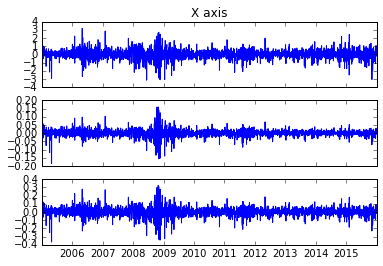

In [40]:
# Let me plot simple-difference data

tseries = dailyPrices.X3
tseries = tseries.dropna()

def simpleDiff(ts=None):
    ''' Simple differencing using shift=+1 
    '''
    return ts - ts.shift(1)

# simple-differencing on raw
simd_raw = simpleDiff(tseries)
# simple differencing on log
simd_log = simpleDiff(np.log(tseries))
# simple differencing on square-root
simd_sq = simpleDiff(tseries**(0.5))

# plot
f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(simd_raw)
axarr[0].set_title('X axis')
axarr[1].plot(simd_log)
axarr[2].plot(simd_sq)


From the three plots above, simple differencing on raw, log or square-root does not appear to be producing increasing variances over time.  We may have converted non-stationary to non-stationary via such simple methods. However, let us test it using testStationarity() function.


In [41]:
# test raw
print("==== Testing simpleDiff on raw data for Stationarity ======")
testStationarity(simd_raw, displayPlot=False)
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("==== Testing simpleDiff on raw data for Stationarity ======")
testStationarity(simd_log, displayPlot=False)
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("==== Testing simpleDiff on square-root for Stationarity ======")
testStationarity(simd_sq, displayPlot=False)
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")


==== Testing simpleDiff on raw data for Stationarity ======
(-39.097652681936374, 0.0, 1, 2766, {'1%': -3.4327163698747731, '5%': -2.8625854938408413, '10%': -2.5673265493658404}, 4695.4110838126908)
Time series - X3, DFTest: Stationary (confidence= 0.99)
<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
==== Testing simpleDiff on raw data for Stationarity ======
(-10.204580981431413, 5.8497505024729747e-18, 26, 2741, {'1%': -3.4327379732269048, '5%': -2.8625950346665778, '10%': -2.567331628897652}, -13329.959946298231)
Time series - X3, DFTest: Stationary (confidence= 0.99)
<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
==== Testing simpleDiff on square-root for Stationarity ======
(-40.248587126943846, 0.0, 1, 2766, {'1%': -3.4327163698747731, '5%': -2.8625854938408413, '10%': -2.5673265493658404}, -8234.0001477589176)
Time series - X3, DFTest: Stationary (confidence= 0.99)
<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


All three conversion methods provide stationary timeseries with confidence = 0.99. The Test-Statistic is very low compared to Critical 1% values and p-value=0 for raw-data and square-root data compared to log-transformed timeseries. Hence, all three methods do not have unit-root. Based purely on the Dickey-Fuller test results, using simple-differencing on square-root data would be the best pick for conversion. However, using log-scale has its advantageous [4]. Considering that the log-transformed data has proven to generate good enough stationary timeseries, I will pick log-based approach.

References:
* 4: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

I will now try 3-day returns on log transformed data to check if that can yield an improved stationary timeseries. In log-scale, difference between P(T) and P(T+3) will directly yield a log-3day Return.

In [42]:
# 3 day returns
tseries = dailyPrices.X3
day3Returns = np.log(tseries) - (np.log(tseries)).shift(3)
print("==== Testing 3Day-returns on log data for Stationarity ======")
testStationarity(day3Returns, displayPlot=False)
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

==== Testing 3Day-returns on log data for Stationarity ======
(-7.1317568574950698, 3.5030213876051792e-10, 21, 1529, {'1%': -3.4346340499635981, '5%': -2.8634321427449732, '10%': -2.5677773493449725}, -6421.8088903430707)
Time series - X3, DFTest: Stationary (confidence= 0.99)
<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


The task is to forecast returns at P(T+3), i.e. 3-day returns. Using 3-day-returns as the stationary series will make the final output easier to interpret without further data-manipulation. However, comparing the difference between Test-Statistic <=> Critical Values and p-values of simple-differencing, it appears the 1-day-returns (log differences) is more desirable than 3-day-returns.

May be I should try removing trends from log-transformed data, this could provide some improvement compared to simple methods. I will use a window of 30-days to perform moving-average smoothing.

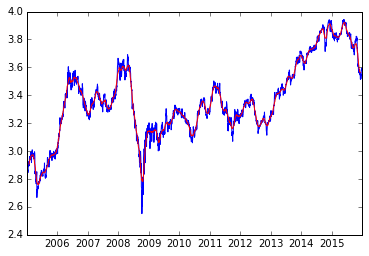

In [43]:
# log transform
tseries = dailyPrices.X3
tseries_log = np.log(tseries.dropna())
ma_30 = pd.Series.rolling(tseries_log, center=True, window=30).mean()

# plot
plt.plot(tseries_log)
plt.plot(ma_30,'r')


(-15.015519538364661, 1.0404146351245429e-27, 25, 2714, {'1%': -3.4327617523031955, '5%': -2.8626055362914116, '10%': -2.5673372199718809}, -13719.768286245482)
Time series - X3, DFTest: Stationary (confidence= 0.99)


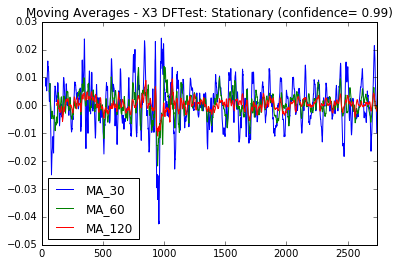

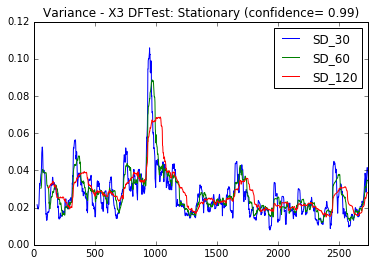

In [44]:
# remove ma_30 from tseries_log
tseries_log_ma30diff = tseries_log - ma_30
# test for stationarity
test = testStationarity(tseries_log_ma30diff)

Although, it has created a stationary time-series with confidence=0.99, the difference between Test-Statistic and Critical 1% is not much compared to simple methods. Maybe removing an exponential-weighted moving average instead of moving-average might give a better result.

In [45]:
# remove exponential moving average from tseries_log
tseries_log_ema30diff = tseries_log - pd.Series.ewm(tseries_log, halflife=30).mean()
# test for stationarity
test = testStationarity(tseries_log_ema30diff, displayPlot=False)


(-4.5633781414981538, 0.00015080640540216861, 27, 2741, {'1%': -3.4327379732269048, '5%': -2.8625950346665778, '10%': -2.567331628897652}, -13462.051274437714)
Time series - X3, DFTest: Stationary (confidence= 0.99)


An exponential-weighted moving average gives a stationary time-series with confidence = 0.95. However, the difference between Test-Statistic <=> Critical 1% values is again not much compared to the simpler methods. 

I will now try something different. I will attempt to smooth the log-transformed data and then convert to daily-returns to see if that can provide any other insight.

In [46]:
#log transform
tseries = dailyPrices.X3
tseries_log = np.log(tseries.dropna())
#smoothed data
ma_30 = pd.Series.rolling(tseries_log, center=True, window=30).mean()
# day-returns
day_returns = ma_30 - ma_30.shift(1)
# 3-day returns
day3_returns = ma_30 - ma_30.shift(3)
# test
print("==== Testing Day-returns on smoothed log data for Stationarity ======")
testStationarity(day_returns, displayPlot=False)
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("==== Testing 3Day-returns on smoothed log data for Stationarity ======")
testStationarity(day3_returns, displayPlot=False)
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

==== Testing Day-returns on smoothed log data for Stationarity ======
(-8.8954531592540214, 1.2104106497811305e-14, 28, 2710, {'1%': -3.432765315465621, '5%': -2.8626071098943244, '10%': -2.5673380577606513}, -29799.46811728417)
Time series - X3, DFTest: Stationary (confidence= 0.99)
<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
==== Testing 3Day-returns on smoothed log data for Stationarity ======
(-6.0644652431176418, 1.1909337740798314e-07, 28, 2708, {'1%': -3.4327671009979617, '5%': -2.8626078984400154, '10%': -2.567338477583788}, -29913.6600155577)
Time series - X3, DFTest: Stationary (confidence= 0.99)
<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


The dickey-fuller test statistics are not better compared to the simple-differencing of log-transformed data.

Simple-differencing yields a stationary time-series with confidence=0.99 and Test-Statistic is very less than Critical 1% values when compared to other types of conversions. I will use simple differencing on log transformed timeseries to convert non-stationary timeseries to stationary timeseries.

I will now wrap this conversion into a function.

=== after conversion test for Stationarity===
(-10.204580981431413, 5.8497505024729747e-18, 26, 2741, {'1%': -3.4327379732269048, '5%': -2.8625950346665778, '10%': -2.567331628897652}, -13329.959946298231)
Time series - X3, DFTest: Stationary (confidence= 0.99)


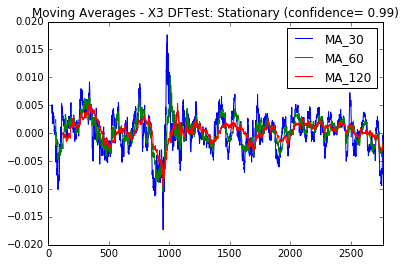

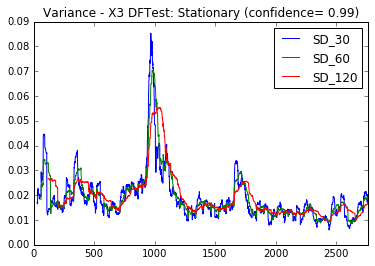

In [47]:
def convert2Stationary(ts=None, disp=True):
    ''' Convert a non-stationary time-series to stationary using simple differencing of
        log-transformed timeseries
        The input time-series is first checked for stationarity then the conversion is done
        
        input: ts -> time-series in normal price
        output: stationary timeseries
    '''
    # log
    ts_log = np.log(ts.dropna())
    out = ts_log
    if not testStationarity(ts, displayPlot=False, displaySummary=False):
        # differencing
        out = ts_log - ts_log.shift(1)
    
    # perform test
    if disp:
        print("=== after conversion test for Stationarity===")
        testStationarity(out, displayPlot=disp, displaySummary=disp)
        
    return out

ts_new = convert2Stationary(dailyPrices.X3)

    

Let me perform a quick test to find out if converting a non-stationary timeseries to stationary has injected independence into the variable. For this, I will use autocorrelation. 

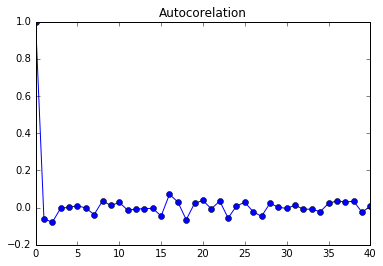

In [48]:
# acf and pacf
statTS = convert2Stationary(dailyPrices.X3, False)
statTS = statTS.dropna()
acf_coeffs = acf(statTS)

# plot
plt.plot(acf_coeffs, marker='o',linestyle='-')
plt.title('Autocorelation')
plt.show()


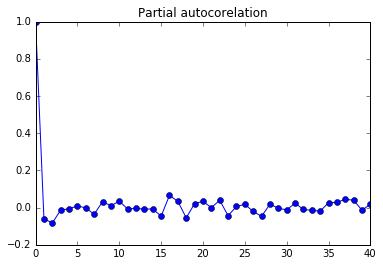

In [49]:
# partial autocorelation
pcf_coeffs = pacf(statTS)

# plot
plt.plot(pcf_coeffs, marker='o',linestyle='-')
plt.title('Partial autocorelation')
plt.show()

Autocorrelation plot reveals that there appears to be no corelation to prices at other timestamps therefore are independent. 

I will now try to decompose the timeseries for seasonality i.e. trend, seasonal and residuals.

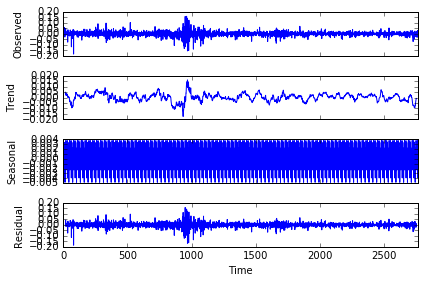

In [50]:
# seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#
day_returns = convert2Stationary(dailyPrices.X3, False)
# index-0 of day_returns will be NAN due to differencing.

# find median
#tmp = statTS.dropna()
#median_ts = tmp.median()
# fill NANs with median
# this is a hack to fill values, may be much more sophisticated filling technique 
# using kalman filters etc might prove advantageous
#statTS_tmp = statTS.fillna(median_ts)
#testStationarity(statTS_tmp)
#
#decomp = seasonal_decompose(statTS_tmp)
decomp = seasonal_decompose(day_returns.dropna().values,freq=30)
decomp.plot()
plt.show()

Trend, seasonal and residual series were generated via decomposition of the timeseries. Trend, seasonal and residual series appears to be stationary. Residual appears to be same as observed data. I am unsure whether this information is useful or not. Do stocks have seasonality? Difficult to say so.


Steps completed:
*  converted non-stationary to stationary timeseries
*  established that the data adheres to random-walk theory




## Modelling & Prediction:

I will now try to perform regression to generate a model, this model should help me in forecasting the future.

The most commonly used regression is Auto-Regressive Moving Average (ARMA)[5] model for timeseries prediction. I will use ARIMA function from Python to predict future prices.

References:
* 5: http://people.duke.edu/~rnau/411arim.htm

Stationary timeseries generated is now an independent variable with no corelations with other values at various timestamps. Hence, I set AR=>p=1, d=0, MA=>q=1.


                              ARMA Model Results                              
Dep. Variable:                     X3   No. Observations:                 2768
Model:                     ARMA(1, 1)   Log Likelihood                6734.171
Method:                       css-mle   S.D. of innovations              0.021
Date:                Wed, 08 Jun 2016   AIC                         -13460.342
Time:                        19:57:00   BIC                         -13436.639
Sample:                    01-04-2005   HQIC                        -13451.781
                         - 12-31-2015                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0003      0.000      0.772      0.440        -0.000     0.001
ar.L1.X3       0.5033      0.112      4.487      0.000         0.283     0.723
ma.L1.X3      -0.5830      0.105     -5.553      0.0

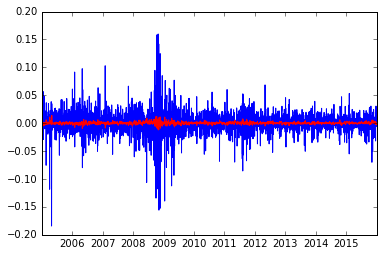

In [51]:
# ARIMA
import statsmodels.tsa as tsa
#
day_returns = convert2Stationary(dailyPrices.X3, False)
# index-0 of day_returns will be NAN due to differencing.

model = tsa.arima_model.ARIMA(day_returns.ix[1:], order=(1,0,1)).fit(disp=-1)
print(model.summary())
#
#dates = pd.date_range(dailyPrices.index[0], dailyPrices.index[-1], freq='D')
#res_s = pd.Series(model.fittedvalues, index=dates)
plt.plot(day_returns.ix[1:])
plt.plot(model.fittedvalues, 'r')
plt.show()


I have now built a model using ARIMA but the fitted-values are not impressive at all. However,log-likelihood has a high value suggesting that the estimates arise from the data. The fitted-values appear to be underestimating/underfitting the data by a large margin.

Let me do some in-sample training and out-of-sample testing.

                              ARMA Model Results                              
Dep. Variable:                     X3   No. Observations:                 1999
Model:                     ARMA(1, 1)   Log Likelihood                4662.662
Method:                       css-mle   S.D. of innovations              0.023
Date:                Wed, 08 Jun 2016   AIC                          -9317.323
Time:                        19:57:04   BIC                          -9294.922
Sample:                    01-04-2005   HQIC                         -9309.098
                         - 12-11-2012                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0002      0.000      0.423      0.672        -0.001     0.001
ar.L1.X3       0.5405      0.105      5.153      0.000         0.335     0.746
ma.L1.X3      -0.6324      0.096     -6.592      0.0

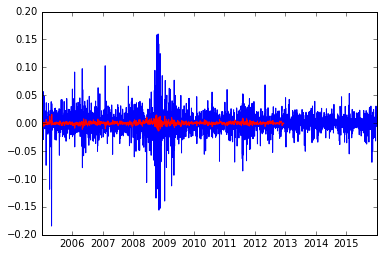

In [52]:
# in-sample training
day_returns = convert2Stationary(dailyPrices.X3, False)
# index-0 of day_returns will be NAN due to differencing.

model = tsa.arima_model.ARIMA(day_returns.ix[1:2000], order=(1,0,1)).fit(disp=-1)
print(model.summary())
#
plt.plot(day_returns.ix[1:])
plt.plot(model.fittedvalues, 'r')
plt.show()

Next, I will perform out of sample testing on a very small number of samples. I will also display some of the key insights into the predicted outcomes.

In order to calculate 3-day returns, I will first calculate a 4-day rolling-sum of day-returns and then subtract the current day's returns to determine 3-day returns. All returns are in log-scale.

In [53]:
# out of sample testing
preds = model.predict(1998, 2009)
orig = day_returns[day_returns.index[1998]: day_returns.index[2009]]
# original prices
#p = dailyPrices.X3.dropna()
#orig_nonstat_lagged = p[statTS_1.index[1498]: statTS_1.index[1509]]
#orig_p = p[statTS_1.index[1499]: statTS_1.index[1510]]
#

# Original-returns: calculate rolling_sum of log-returns over a window of 4 days, including current day
rollsum = pd.Series.rolling(orig, center=False, window=4).sum()
orig_day3_returns =  orig - rollsum.shift(-3)
# Predicted-returns: 
rollsum = pd.Series.rolling(preds, center=False, window=4).sum()
preds_day3_returns =  preds - rollsum.shift(-3)

tmp = pd.DataFrame(orig.index)
tmp['Orig Log Returns'] = orig.values
tmp['Pred Log Returns'] = preds.values
tmp['AbsError'] = np.abs(orig.values-preds.values)
tmp['AbsPercentError(%)'] = np.abs((orig.values-preds.values)/orig.values) * 100 
tmp['DirectionAccuracy'] = ~((orig.values > 0) != (preds.values > 0))
tmp['Orig 3-day Log returns'] = orig_day3_returns.values
tmp['Pred 3-day Log returns'] = preds_day3_returns.values
tmp['3-day AbsError'] = np.abs(orig_day3_returns.values - preds_day3_returns.values)
tmp['3-day AbsPercentError(%)'] = np.abs((orig_day3_returns.values - preds_day3_returns.values)/orig_day3_returns.values) * 100 
tmp['3-day DirectionAccuracy'] = ~((orig_day3_returns.values > 0) != (preds_day3_returns.values > 0))
tmp


0  Orig Log Returns  Pred Log Returns  AbsError  \
0  2012-12-10         -0.007756         -0.000081  0.007676   
1  2012-12-11          0.007388         -0.000649  0.008037   
2  2012-12-12          0.001839         -0.000269  0.002107   
3  2012-12-13         -0.002575         -0.000064  0.002511   
4  2012-12-14         -0.002212          0.000047  0.002260   
5  2012-12-17          0.011013          0.000107  0.010906   
6  2012-12-18          0.024880          0.000140  0.024740   
7  2012-12-19         -0.006789          0.000157  0.006947   
8  2012-12-20          0.005007          0.000167  0.004841   
9  2012-12-21         -0.008959          0.000172  0.009131   
10 2012-12-24         -0.001441          0.000175  0.001615   
11 2012-12-26         -0.009781          0.000176  0.009957   

    AbsPercentError(%) DirectionAccuracy  Orig 3-day Log returns  \
0            98.961536              True               -0.006652   
1           108.777469             False                0.002949   
2           114.620923             False               -0.006226   
3            97.530179              True               -0.033681   
4           102.139079             False               -0.029104   
5            99.025935              True               -0.023097   
6            99.438574              True                0.010741   
7           102.315297             False                0.005393   
8            96.671564              True                0.020181   
9           101.917369             False                     NaN   
10          112.113274             False                     NaN   
11          101.799813             False                     NaN   

    Pred 3-day Log returns  3-day AbsError  3-day AbsPercentError(%)  \
0                 0.000981        0.007633                114.746366   
1                 0.000285        0.002664                 90.331877   
2                -0.000091        0.006135                 98.538305   
3                -0.000294        0.033386                 99.126256   
4                -0.000404        0.028699                 98.611328   
5                -0.000464        0.022634                 97.993121   
6                -0.000496        0.011237                104.614305   
7                -0.000513        0.005906                109.512409   
8                -0.000522        0.020703                102.588387   
9                      NaN             NaN                       NaN   
10                     NaN             NaN                       NaN   
11                     NaN             NaN                       NaN   

   3-day DirectionAccuracy  
0                    False  
1                     True  
2                     True  
3                     True  
4                     True  
5                     True  
6                    False  
7                    False  
8                    False  
9                     True  
10                    True  
11                    True

I have performed in-sample training using first 1999 ticks of timeseries data and then an out-of-sample testing using small subset of ticks (12 ticks). Absolute Percent Error for daily returns appears to be high, however, direction (up/down) accuracy has 5 correct out of 12 instances for log day-returns. This is a very rudimentary test and highly unreliable. Much more rigourous training and testing regime needs to followed to build a reliable model.

Looking at 3-day returns, again Absolute Percent Error is high however, direction accuracy is correct for 5 out of 9 instances.

Observations:
*  Difference of log-timeseries appears to be one of the better representations of a stationary timeseries for auto-regression modelling and forecasting purposes. However, difference of square-root was shown to be the best via Dickey-Fuller tests.
*  ARIMA model with order (1,0,1) could be used for forecasting
*  As I will be using differencing of log-timeseries which is essentially the day-returns, calculating the 3-day returns should be simple step
*  ARIMA may not be the best modelling technique. I need to spend more time delving into the ARIMA model statistics to get a better insight into whether anything can be improved?
*  Multivariate data might be useful as we could employ more sophisticated modelling techniques
*  Features could be extracted from this univariate data that could possibly aid in using more sophisticated modelling techniques
*  Decomposition such as trend, seasonal and residual may/may not provide useful information, further reading is required on my part
*  python ARIMA has very little help docs and is very tricky to use, for example, forecasting for a timestamp that does not exist in the timeseries is not an easy task.

I will now try to forecast one-datapoint into the future:

In [54]:
# original timeseries
orig_tseries = dailyPrices.X3
# create a new time series by pushing it 3-days ahead and fill it with 0
pushed_tseries = pd.Series(0, orig_tseries.index + pd.Timedelta('3 day'))
# extract the last 3-days from pushed_tseries and append it to original timeseries
tseries = orig_tseries.append(pushed_tseries[-3 : pushed_tseries.shape[0]], verify_integrity=True)

# convert original timeseries X3 to stationary
day_returns = convert2Stationary(dailyPrices.X3, False)
# index-0 of day_returns will be NAN due to differencing.
# usually day_returns[original_length+1] will have -INF due to 0 insertion.

# modelling (use all data starting from index-1 day of day_returns to the lastday of the orignal timeseries)
model = tsa.arima_model.ARIMA(day_returns.ix[1:], order=(1,0,1)).fit(disp=-1)
print(model.summary())

# index of day_returns runs from 0:day_returns.shape[0]-1, there are total of day_returns.shape[0] elements
# we are ignoring inedx-0 while training (it might contain NAN due to differencing), hence we are only training
# with day_returns.shape[0]-1 elements (with indexing running from 1:day_returns.shape[0]-1). 
# Therefore the trained-model will have a length of ((day_returns.shape[0]-1)-1)
# For prediction, the starting index should atleast be the last fittedvalue.

# predict
preds = model.predict(model.fittedvalues.shape[0]-1, model.fittedvalues.shape[0]+2 )

### calculate error metrics and accuracy of fittedvalues
# Original-returns: calculate rolling_sum of log-returns over a window of 4 days, including current day
orig_returns = day_returns[1:]
rollsum = pd.Series.rolling(orig_returns, center=False, window=4).sum()
orig_3day_returns =  orig_returns - rollsum.shift(-3)
# fitted-returns: 
rollsum = pd.Series.rolling(model.fittedvalues, center=False, window=4).sum()
fitted_3day_returns =  model.fittedvalues - rollsum.shift(-3)
# display dataframe


statsFrame = pd.DataFrame(orig_returns.index)
statsFrame['Orig Log Returns'] = orig_returns.values
statsFrame['Pred Log Returns'] = model.fittedvalues.values
statsFrame['AbsError'] = np.abs(orig_returns.values - model.fittedvalues.values)
statsFrame['AbsPercentError(%)'] = np.abs((orig_returns.values - model.fittedvalues.values)/(orig_returns.values+0.00000001)) * 100 
statsFrame['DirectionAccuracy'] = ~((orig_returns.values > 0) != (model.fittedvalues.values > 0))
statsFrame['Orig 3-day Log returns'] = orig_3day_returns.values
statsFrame['Pred 3-day Log returns'] = fitted_3day_returns.values
statsFrame['3-day AbsError'] = np.abs(orig_3day_returns.values - fitted_3day_returns.values)
statsFrame['3-day AbsPercentError(%)'] = np.abs((orig_3day_returns.values - fitted_3day_returns.values)/(orig_3day_returns.values+0.00000001)) * 100 
statsFrame['3-day DirectionAccuracy'] = ~((orig_3day_returns.values > 0) != (fitted_3day_returns.values > 0))
# calculate


# create a fitted_day_returns series using index from new timeseries (created used pushed_timeseries) and fittedvalues
fitted_day_returns = pd.Series(model.fittedvalues, index=tseries.index)
# copy the forecast values to correct dates
fitted_day_returns[-4 : fitted_day_returns.shape[0]] = preds
forecast_day_returns = fitted_day_returns[-4 : fitted_day_returns.shape[0]]

# Predicted-returns: 
rollsum = pd.Series.rolling(forecast_day_returns, center=False, window=4).sum()
forecast_3day_returns =  forecast_day_returns - rollsum.shift(-3)

# Display
print("=====  3-day Returns forecast for closing price of last-day in timeseries ======")
print("           Note: The first row in the table corresponds to the last day \n           closing price of the stock")
print("   Stock: "+ dailyPrices.X3.name)
futureFrame = pd.DataFrame(forecast_day_returns.index)
futureFrame['Forecast Log Returns'] = forecast_day_returns.values
futureFrame['Forecast 3-day Log Returns'] = forecast_3day_returns.values
futureFrame['Long term MAE (log returns)'] = np.mean(statsFrame['AbsError'])
futureFrame['Long term MAPE (log returns) %'] = np.mean(statsFrame['AbsPercentError(%)']/100)*100
futureFrame['Long term DirectionAccuracy (log returns) %'] = (sum(statsFrame['DirectionAccuracy'])/statsFrame.shape[0]) * 100
futureFrame['Long term MAE (3-day log returns)'] = np.mean(statsFrame['3-day AbsError'])
futureFrame['Long term MAPE (3-day log returns) %'] = np.mean(statsFrame['3-day AbsPercentError(%)']/100) * 100 
futureFrame['Long term DirectionAccuracy (3-day log returns) %'] = (sum(statsFrame['3-day DirectionAccuracy'])/statsFrame.shape[0]) * 100
print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
futureFrame


                              ARMA Model Results                              
Dep. Variable:                     X3   No. Observations:                 2768
Model:                     ARMA(1, 1)   Log Likelihood                6734.171
Method:                       css-mle   S.D. of innovations              0.021
Date:                Wed, 08 Jun 2016   AIC                         -13460.342
Time:                        19:57:23   BIC                         -13436.639
Sample:                    01-04-2005   HQIC                        -13451.781
                         - 12-31-2015                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0003      0.000      0.772      0.440        -0.000     0.001
ar.L1.X3       0.5033      0.112      4.487      0.000         0.283     0.723
ma.L1.X3      -0.5830      0.105     -5.553      0.0

0  Forecast Log Returns  Forecast 3-day Log Returns  \
0 2015-12-31             -0.000133                   -0.001179   
1 2016-01-01              0.000486                         NaN   
2 2016-01-02              0.000374                         NaN   
3 2016-01-03              0.000318                         NaN   

   Long term MAE (log returns)  Long term MAPE (log returns) %  \
0                     0.014031                   146605.880408   
1                     0.014031                   146605.880408   
2                     0.014031                   146605.880408   
3                     0.014031                   146605.880408   

   Long term DirectionAccuracy (log returns) %  \
0                                    52.998555   
1                                    52.998555   
2                                    52.998555   
3                                    52.998555   

   Long term MAE (3-day log returns)  Long term MAPE (3-day log returns) %  \
0                           0.025966                         204584.211969   
1                           0.025966                         204584.211969   
2                           0.025966                         204584.211969   
3                           0.025966                         204584.211969   

   Long term DirectionAccuracy (3-day log returns) %  
0                                           35.07948  
1                                           35.07948  
2                                           35.07948  
3                                           35.07948

The first row corresponds to the last-day closing price of the stock available in the dataset. This might vary from stock to stock. I have included day-log-returns and 3-day-log-returns forecast. I have also included metrics from fitting the model to prior data. These metrics might be considered for measuring the confidence in the forecast. Direction-Accuracy refers to whether the direction-of-movement of the stock was correctly predicted in the prior-data. From the table it is obvious that the modelling is not very good. Direction-Accuracy of day-returns appears to be slightly better than random (random = coin toss), whereas direction-accuracy for 3-day returns is just 35%.

I think, I need to look closer into ARIMA modelling or better look at other ways of modelling/forecasting univariate data. I have neither spent time optimising the parameters for ARIMA in this task nor have I looked at all stocks to generalise the exploration-analysis-modelling-prediction pipeline.

I have now completed exploration, analysis, modelling and prediction of a time-series (specifically stock: X3) for forecasting 3-day returns.

I will now wrap this into a function and produce 3-day returns for all stocks in the dataset.